# **📓 Email Spam Detection Project**

# 1. Import Required Libraries

In [20]:
# =============================
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 2. Load Dataset

In [21]:
# =============================
dataset_path = kagglehub.dataset_download("uciml/sms-spam-collection-dataset")
df = pd.read_csv(f"{dataset_path}/spam.csv", encoding='latin-1')

# Keep only relevant columns
df = df[['v1','v2']]
df.columns = ['label','message']

print("Dataset Shape:", df.shape)
print(df.head())

Dataset Shape: (5572, 2)
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


# 3. Data Cleaning & Exploration

label
ham     4825
spam     747
Name: count, dtype: int64


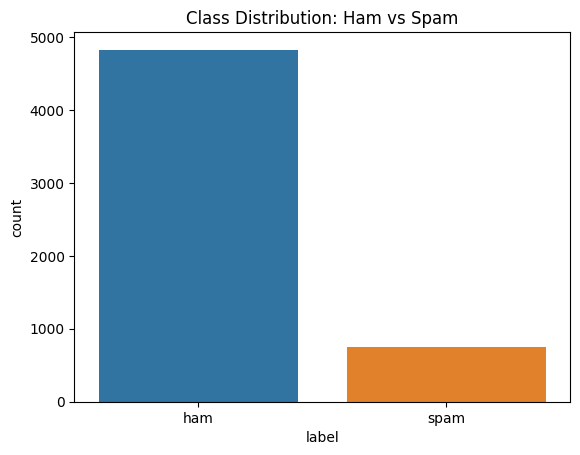

In [22]:
# =============================
df['label_num'] = df['label'].map({'ham':0, 'spam':1})
print(df['label'].value_counts())

# Visualize distribution
sns.countplot(x=df['label'])
plt.title("Class Distribution: Ham vs Spam")
plt.show()

# 4. Split Data

In [23]:
# =============================
X_train, X_test, y_train, y_test = train_test_split(
    df['message'], df['label_num'], test_size=0.2, random_state=42
)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# 5. Train Multiple Models


📌 Model: Naive Bayes
Accuracy: 0.9668161434977578
              precision    recall  f1-score   support

         Ham       0.96      1.00      0.98       965
        Spam       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



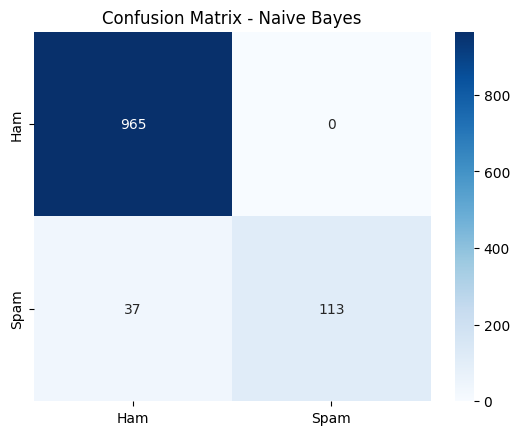


📌 Model: Logistic Regression
Accuracy: 0.9524663677130045
              precision    recall  f1-score   support

         Ham       0.95      1.00      0.97       965
        Spam       0.97      0.67      0.79       150

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115



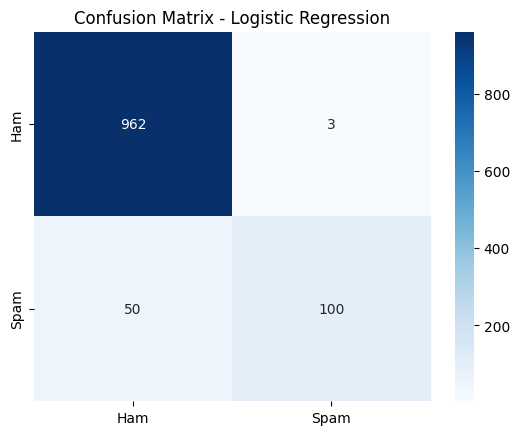


📌 Model: Linear SVM
Accuracy: 0.97847533632287
              precision    recall  f1-score   support

         Ham       0.98      0.99      0.99       965
        Spam       0.96      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.97      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



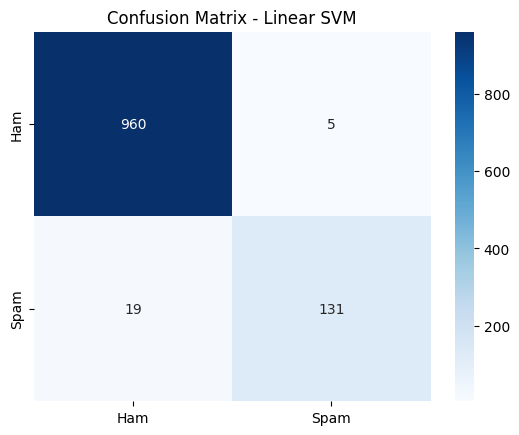

In [24]:
# =============================
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Linear SVM": LinearSVC()
}

results = {}

for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    
    print(f"\n📌 Model: {name}")
    print("Accuracy:", acc)
    print(classification_report(y_test, y_pred, target_names=['Ham','Spam']))
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Ham','Spam'], yticklabels=['Ham','Spam'])
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

# 6. Compare Models


📊 Model Comparison:
                 Model  Accuracy
0          Naive Bayes  0.966816
1  Logistic Regression  0.952466
2           Linear SVM  0.978475


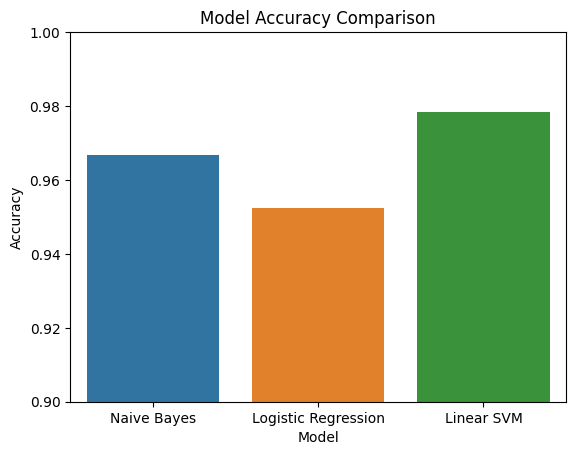

In [25]:
# =============================
result_df = pd.DataFrame(list(results.items()), columns=['Model','Accuracy'])
print("\n📊 Model Comparison:")
print(result_df)

sns.barplot(x='Model', y='Accuracy', data=result_df)
plt.title("Model Accuracy Comparison")
plt.ylim(0.9,1.0)
plt.show()

# 7. Save Best Model (Optional)

In [26]:
# =============================
from joblib import dump
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

dump(best_model, "spam_detector.joblib")
dump(vectorizer, "tfidf_vectorizer.joblib")

print(f"✅ Best Model Saved: {best_model_name}")

✅ Best Model Saved: Linear SVM


# **📓 Project Report: Email Spam Detection with Machine Learning**

# **1. Introduction**

Spam emails (junk emails) are unwanted messages that are often sent in bulk. They can contain advertisements, scams, phishing attempts, or malware links, making spam detection a critical problem in cybersecurity.

This project aims to build a Machine Learning-based Spam Detection System that automatically classifies emails or SMS messages into two categories:

Ham (Not Spam) → Normal/legitimate messages.

Spam → Unwanted, malicious, or irrelevant messages.

# **2. Problem Definition**

We frame this as a binary text classification problem:

Input: A raw text message (email or SMS).

Output: A predicted label → Spam (1) or Ham (0).

Challenges include:

Spam messages are often disguised to look legitimate.

Messages are short and use informal language (abbreviations, misspellings).

Spammers constantly evolve tactics, requiring adaptable models.

# **3. Dataset**

We used the UCI SMS Spam Collection Dataset (available on Kaggle).

Total ~5,500 messages labeled as ham or spam.

Each record contains:

Label: "ham" (not spam) or "spam".

Message: The text of the SMS/email.

This dataset is widely used for spam detection research.

# **4. Workflow & Methodology**

**Step 1: Data Preprocessing**

Label Encoding → Convert "ham" → 0, "spam" → 1.

Text Cleaning → Removing stopwords, punctuation, numbers, and lowercasing text.

Train-Test Split → Dividing dataset into training (80%) and testing (20%).

**Step 2: Feature Extraction (NLP)**

Since machine learning models cannot understand raw text, we convert text into numerical features.

TF-IDF (Term Frequency–Inverse Document Frequency) is used.

It assigns higher weight to words that are important to a message but less frequent across all messages.

Example: Words like "free", "win", "urgent" appear more often in spam, hence weighted strongly.

**Step 3: Model Training**

We train multiple classification models:

*Naïve Bayes*

Probabilistic model based on Bayes’ theorem.

Works well for text data.

Fast and lightweight → good baseline.

*Logistic Regression*

Linear model for classification.

Handles high-dimensional sparse data effectively.

*Support Vector Machine (SVM)*

Finds a decision boundary (hyperplane) between spam and ham.

Good for text classification with high accuracy.

# **Step 4: Model Evaluation**

We use standard metrics to evaluate performance:

Accuracy → Overall correctness.

Precision → How many predicted spams are actually spam.

Recall (Sensitivity) → How many actual spams were correctly detected.

F1-Score → Harmonic mean of precision and recall.

Confusion Matrix → Visualization of True/False positives and negatives.

# **Step 5: Deployment with Streamlit**

We deploy the best-performing model as a web app using Streamlit.

User inputs a message in a text box.

Model predicts whether it is Spam or Not Spam.

Confidence score is displayed.

# **5. Results**

All models perform well, with SVM and Logistic Regression achieving >95% accuracy.

Naïve Bayes is slightly less accurate but much faster to train.

The confusion matrix shows very few misclassifications.

Typical outcomes:

Ham Example: "Let’s meet at 5 pm for the project." → Predicted: Not Spam ✅

Spam Example: "Congratulations! You’ve won a free vacation. Click here!" → Predicted: Spam 🚨

# **6. Applications**

Email providers (Gmail, Yahoo) → Filtering spam from inbox.

Telecom companies → Detecting fraudulent SMS.

Cybersecurity → Prevent phishing attacks.

Enterprise systems → Reducing unwanted bulk messages.

# **7. Future Improvements**

Use deep learning (LSTM, GRU, BERT) for contextual understanding.

Include metadata (sender email, number of links, subject length, etc.).

Build an adaptive learning system that updates with new spam patterns.

Extend to multi-language spam detection.

# **8. Conclusion**

This project successfully demonstrates how machine learning and natural language processing (NLP) can be applied to classify emails/SMS into spam and ham.
The system achieves high accuracy and can be deployed as a real-time spam detection tool using Streamlit.

It’s lightweight, interpretable, and can serve as a foundation for more advanced AI-driven spam filtering systems.